In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.stats as stats

from pandas import DataFrame
from pandas import Series



In [2]:
# read in data
local_file="genre.csv"
source=local_file
df_genre = pd.read_csv(source)
df_genre.drop(df_genre.columns[0], inplace=True, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_genre.head()
df_genre.dtypes

tconst            object
genre2            object
primaryTitle      object
startYear         object
averageRating    float64
numVotes           int64
dtype: object

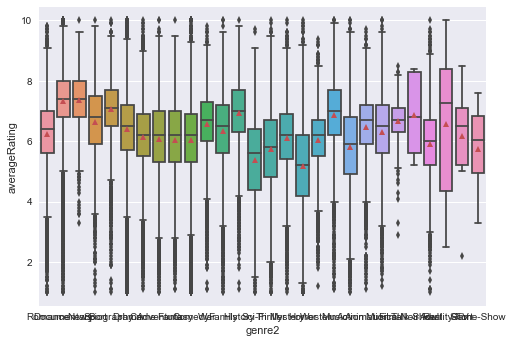

In [35]:
import seaborn as sns

sns.boxplot(x=df_genre['genre2'], y=df_genre['averageRating'], showmeans=True)
plt.show()

In [23]:
df_genre.genre2.unique()

array(['Romance', 'Documentary', 'News', 'Sport', 'Biography', 'Drama',
       'Crime', 'Adventure', 'Fantasy', 'Comedy', 'War', 'Family',
       'History', 'Sci-Fi', 'Thriller', 'Mystery', 'Horror', 'Western',
       'Music', 'Action', 'Animation', 'Musical', 'Film-Noir', 'Talk-Show',
       'Adult', 'Reality-TV', 'Short', 'Game-Show'], dtype=object)

In [31]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

In [32]:
model = smf.ols(formula='averageRating ~ genre2', data=df_genre)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     1814.
Date:                Wed, 15 Nov 2017   Prob (F-statistic):               0.00
Time:                        18:07:57   Log-Likelihood:            -5.4898e+05
No. Observations:              337904   AIC:                         1.098e+06
Df Residuals:                  337876   BIC:                         1.098e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.79

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('averageRating ~ genre2',
                data=df_genre).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                 sum_sq        df            F  PR(>F)
genre2     73904.261526      27.0  1813.710098     0.0
Residual  509911.950985  337876.0          NaN     NaN
